Regression line: y = 7.1251x + 0.0515


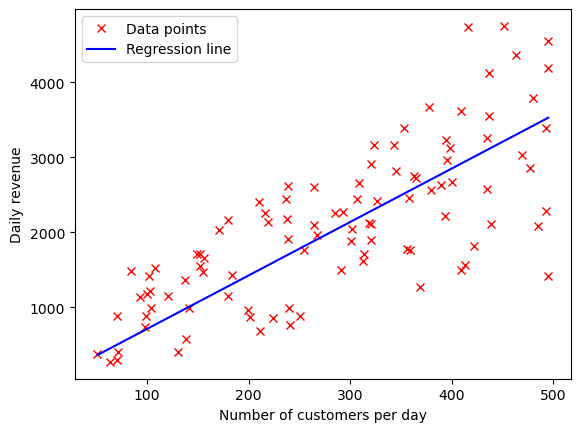

In [153]:
from typing import List
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def f(w: float, b: float, x: float) -> float:
    return (w*x)+b

def cost(w: float, b: float, x_data: List[float], y_data: List[float]) -> float:
    m = len(x_data)
    J = 0
    for i in range(m):
        J += (f(w,b,x_data[i]) - y_data[i])**2
    J = J / (2*m)
    return J

def descent_step(alpha: float, w: float, b: float, x_data: List[float], y_data: List[float]) -> List[float]:
    dJ_dw = 0
    dJ_db = 0
    m = len(x_data)
    for i in range(m):
        dJ_dw += (f(w,b,x_data[i]) - y_data[i])*x_data[i]
        dJ_db += (f(w,b,x_data[i]) - y_data[i])
    dJ_dw = dJ_dw/m
    dJ_db = dJ_db/m
    w,b = w - (alpha*dJ_dw),b - (alpha*dJ_db)
    return w,b

def gradient_descent(n: int, x_data: List[float], y_data: List[float]):
    alpha=0.000005
    w,b = 0,0
    for _ in range(n):
        w,b = descent_step(alpha,w,b,x_data,y_data)
    return w,b

file_path = os.path.expanduser("~/Desktop/Cute lil programs/coffeeshop_record.csv") 
path = pd.read_csv(file_path)

x_data = path['Number_of_Customers_Per_Day']
y_data = path['Daily_Revenue']
w,b = gradient_descent(100,x_data,y_data)

print(f"Regression line: y = {w:.4f}x + {b:.4f}")
plt.plot(x_data,y_data,'x', c='r', label = 'Data points')
plt.plot([min(x_data),max(x_data)],[f(w,b,min(x_data)),f(w,b,max(x_data))], c = 'b', label = 'Regression line')
plt.xlabel('Number of customers per day')
plt.ylabel('Daily revenue')
plt.legend()
plt.show()